# Visualize Residual Forecast Errors
Forecase errors on time series regression problems are called residuals or residual errors. Careful exploration of residual errors on your time series prediction problem can tell you a lot about your forecast model and even suggest improvements.

In [18]:
# Calculate Residuals from a persistence forecast
from pandas import Series
from pandas import DataFrame
from pandas import concat
series = Series.from_csv('female-births.csv', header = 0)
series = series[:-1]
#Create lagged set
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+a']

#split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_x, train_y = train[:,0], train[:,1]
test_x, test_y = test[:,0], test[:,1]

#persistence model
predictions = [x for x in test_x]

#calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


## Residual Line Plot

The first plot is to look at the residual forecast errors over time as a line plot. We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure. The array of residual errors can be wrapped in a Pandas DataFrame and plotted directly.

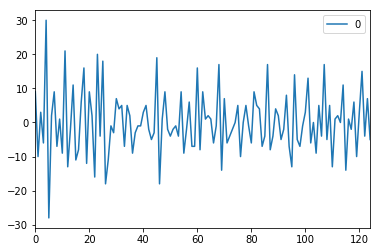

In [8]:
# Line plot
from matplotlib import pyplot
residuals.plot()
pyplot.show()

Running the example shows a seemingly random plot of the residual time series. If we did see trend, seasonal or cyclic structure, we could go back to our model and attempt to capture those elements directly.

## Residual Summar Satistics

We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [10]:
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


Running the example shows a mean error value close to zero, but perhaps not close enough. It suggests that there may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (0.064000) to forecasts. This may work in this case, but it is a naive form of bias correction and there are more sophisticated methods available.

## Residual Histogram and Density Plots

Populating the interactive namespace from numpy and matplotlib


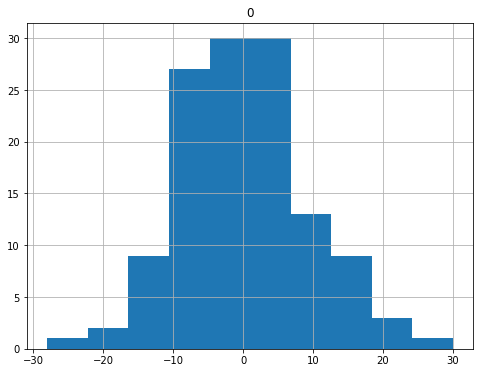

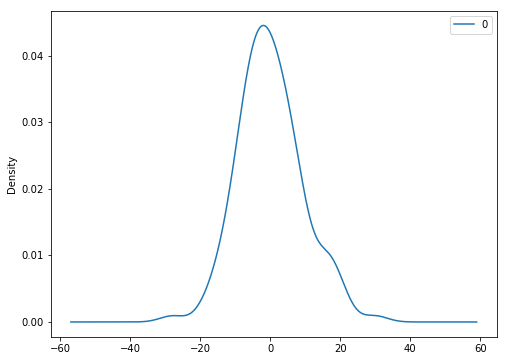

In [15]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8,6)
#residuals histogram
residuals.hist()
pyplot.show()

#residuals density plot
residuals.plot(kind='kde')
pyplot.show()

We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential distribution with some asymmetry. If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling process were perhaps incorrect and that a different modeling method may be required. A large skew may suggest the opportunity for performing a transform to the data prior to modeling, such as taking the log or square root.

## Residual Q-Q Plot
A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or di↵erent they happen to be.

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

The plot is helpful to spot obvious departures from this expectation.

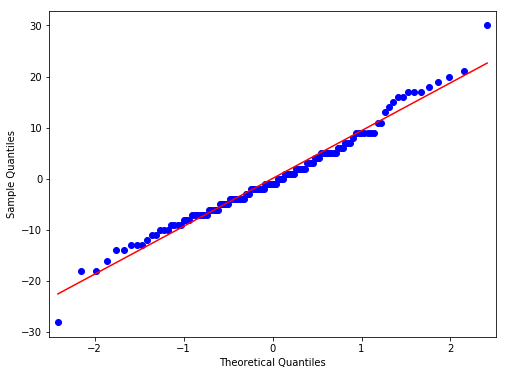

In [20]:
# Calculate Residuals from a persistence forecast
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot

series = Series.from_csv('female-births.csv', header = 0)
series = series[:-1]

#Create lagged set
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+a']

#split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_x, train_y = train[:,0], train[:,1]
test_x, test_y = test[:,0], test[:,1]

#persistence model
predictions = [x for x in test_x]

#calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

## Residual Autocorrelation

Autocorrelation calculates the strength of the relationship between an observation and observa- tions at prior time steps. We can calculate the autocorrelation of the residual error time series and plot the results. This is called an autocorrelation plot. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

A significant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression. Pandas provides a built-in function for calculating an autocorrelation plot, called autocorrelation plot().

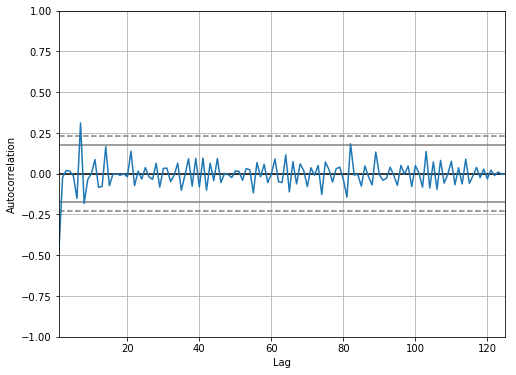

In [21]:
# Calculate Residuals from a persistence forecast
from pandas import Series
from pandas import DataFrame
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot

series = Series.from_csv('female-births.csv', header = 0)
series = series[:-1]

#Create lagged set
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+a']

#split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_x, train_y = train[:,0], train[:,1]
test_x, test_y = test[:,0], test[:,1]

#persistence model
predictions = [x for x in test_x]

#calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 7 that seems significant.